In [1]:
from fastai.vision.all import *

# Make one-channel images display in greyscale.
# See https://forums.fast.ai/t/show-image-displays-color-image-for-mnist-sample-dataset/78932/4
matplotlib.rc('image', cmap='Greys')

## Exercise 1

In [3]:
path = untar_data(URLs.PETS)/'images'
path

Path('/scratch/cs344/data/oxford-iiit-pet/images')

In [4]:
# Cat images have filenames that start with a capital letter.
def is_cat(filename):
    return filename[0].isupper()

image_files = get_image_files(path).sorted()

# Construct the data loader
set_seed(12345, reproducible=True)
dataloaders = ImageDataLoaders.from_name_func(
    path=path,
    fnames=image_files,
    # Use a 20% validation split, with a seed of 42 for reproducibiliy
    valid_pct=0.2,
    seed=42,
    # label files using their name
    label_func=is_cat,
    # Resize all images to 224x224 pixels
    item_tfms=Resize(224),
)

In [6]:
learn = cnn_learner(
    dls=dataloaders,
    arch=resnet18,
    metrics=error_rate
)
learn.fine_tune(epochs=1)

epoch,train_loss,valid_loss,error_rate,time
0,0.168514,0.029453,0.010149,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.047721,0.024110,0.008119,00:16


In [11]:
dataloaders.train.bs

64

In [12]:
images.shape

torch.Size([64, 3, 224, 224])

<AxesSubplot:>

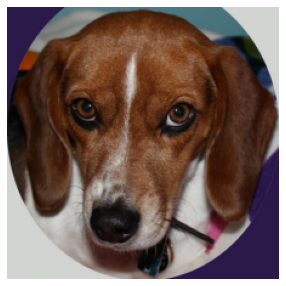

In [14]:
show_image(images[2])

<AxesSubplot:>

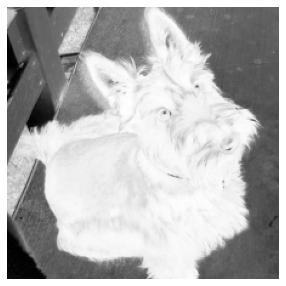

In [16]:
show_image(images[4, 2])

*The following command shows the opposite of each image

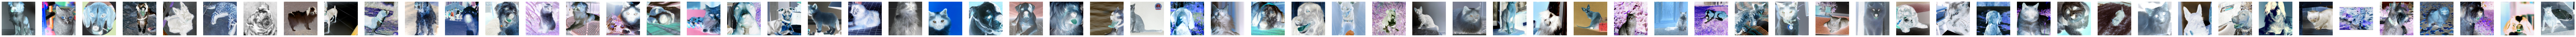

In [23]:
show_images(255 - images)

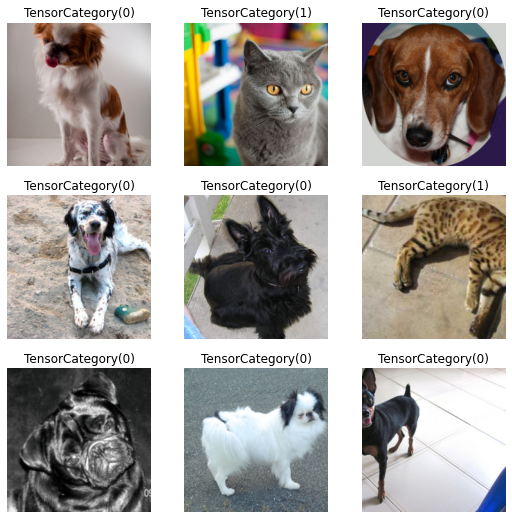

In [8]:
batch_transformed = dataloaders.train.one_batch()
batch = dataloaders.train.decode(batch_transformed)
images_orig, labels = batch
images = images_orig.clone()

show_image_batch((images, labels))

In [10]:
clf_1_error_rates = [0.002706, 0.008796]
clf_2_error_rates = [0.010149, 0.008119]